In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [4]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {
        'map_name': '4x4',
        'is_slippery': False
    }
)
env = gym.make('FrozenLake-v3')

In [10]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

#Set learning parameters
num_episodes = 2000

#Create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    #The Q-Table learning algorithm
    while not done:
        action = rargmax(Q[state, :])
        
        #Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        
        #Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate: 0.926
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]
  (Right)
SFFF
FHFH
FFFH
HFFG


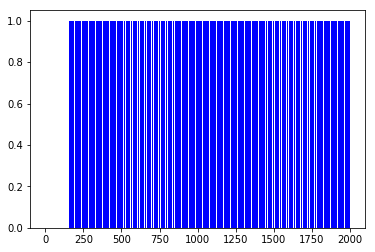

In [12]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
env.render()
plt.bar(range(len(rList)), rList, color = "blue")
plt.show()